# チェビシェフの不等式

In [34]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2
import math
import polars as pl
from itertools import chain
set_plot_params()
name = Path().cwd().name + "/chebyshev"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [11]:

df = pl.read_csv("./r5_math2B.csv")

In [30]:
point_arr = df["point"].to_list()
n_arr = df["n"].to_list()

In [40]:
data = []
for point, n in zip(point_arr, n_arr):
    data.append([point]*n)
data = np.array(list(chain.from_iterable(data)))
data.mean(), data.std()

(np.float64(61.482735975347936), np.float64(20.176748738716714))

In [50]:
len(data)

316728

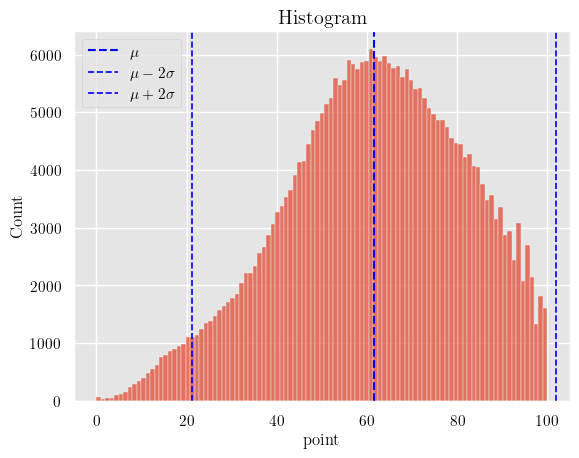

In [60]:
# 平均と標準偏差
mu = float(np.mean(data))
sigma = float(np.std(data, ddof=0))  # 標本で不偏なら ddof=1

# ヒストグラム
sns.histplot(data, bins=101)

# 縦線: 平均, 平均±2σ
plt.axvline(mu, linestyle="--", linewidth=1.5, label="$\mu$", color="blue")
plt.axvline(mu - 2*sigma, linestyle="--", linewidth=1.2, label="$\mu-2\sigma$", color="blue")
plt.axvline(mu + 2*sigma, linestyle="--", linewidth=1.2, label="$\mu+2\sigma$", color="blue")

plt.title("Histogram")
plt.xlabel("point")
plt.legend()

plt.savefig(save_dir.joinpath("hist.png"), dpi=300, facecolor="white")
plt.show()

In [77]:
n = len(data[data<=mu - 2*sigma])
n/len(data)*100, mu, sigma

(3.463855421686747, 61.482735975347936, 20.176748738716714)